# Régression Régularisées : RIDGE


0. Importez les libairies usuelles 

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

  1. Chargez en mémoire le dataset des prix des logements à boston grâce à la commande :
  
 
```
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
```

In [134]:
X = boston_df.copy()
y = boston.target
boston_df["Price"] = y

In [135]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [136]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


  2. Créez un dataframe contenant les variables explicatives et un autre contenant uniquement la variable cible qui est le prix des maisons

3. Utilisez la commande `train_test_split ` du package `sklearn.model_selection`  afin de créer un échantillon d’entraînement contenant 70% des observations et un échantillon test contenant 30% des observations.

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Normalize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_fit = sc.fit(X_train)
X_train = sc_fit.transform(X_train)
X_test = sc_fit.transform(X_test)

In [139]:
from sklearn.linear_model import LinearRegression, Ridge

reg = LinearRegression().fit(X_train, y_train)
rdg001 = Ridge(alpha=0.01).fit(X_train, y_train)
rdg100 = Ridge(alpha=100).fit(X_train, y_train)

4. Générer un modèle de régression linéaire classique, un modèle ridge où alpha vaut 0.01 et un modèle ridge où alpha vaut 100.

5. Entraînez ces modèles sur les données sur les données d’apprentissage

6. Produisez les scores de performance de c’est trois modèles sur l’échantillon d’apprentissage et de validation grâce à l’attribut .score

In [140]:
print(f"Linear Regression {reg.score(X_train, y_train)}")
print(f"Ridge alpha 0.01 {rdg001.score(X_train, y_train)}")
print(f"Ridge alpha 100 {rdg100.score(X_train, y_train)}")

Linear Regression 0.7448484215823743
Ridge alpha 0.01 0.7448484185132322
Ridge alpha 100 0.7125213830504529


7. Comparez les coefficients des trois modèle à l’aide d’un graphique, que remarquez vous ?

In [142]:
def transform(arr, name):
    arr_ser = pd.Series(arr, name=f"coef_{name}")
    arr_ser_abs = abs(pd.Series(arr, name=f"coef_abs_{name}"))
    return pd.concat([arr_ser, arr_ser_abs], axis =1)

reg_ser = transform(reg.coef_, "linear_regressor")
rdg_small = transform(rdg001.coef_, "ridge_small_alpha")
rdg_large = transform(rdg100.coef_, "ridge_large_alpha")

In [143]:
coeffs = pd.concat([pd.Series(boston_df.columns[:-1], name="features"), reg_ser, rdg_small, rdg_large], axis =1 )

In [144]:
coeffs

,features,coef_linear_regressor,coef_abs_linear_regressor,coef_ridge_small_alpha,coef_abs_ridge_small_alpha,coef_ridge_large_alpha,coef_abs_ridge_large_alpha
0,CRIM,-1.040579,1.040579,-1.040382,1.040382,-0.582214,0.582214
1,ZN,1.376990,1.376990,1.376740,1.376740,0.726288,0.726288
2,INDUS,-0.124623,0.124623,-0.125017,0.125017,-0.639024,0.639024
3,CHAS,0.493386,0.493386,0.493421,0.493421,0.511646,0.511646
4,NOX,-2.348105,2.348105,-2.347659,2.347659,-0.875524,0.875524
5,RM,2.538551,2.538551,2.538701,2.538701,2.655222,2.655222
6,AGE,-0.073287,0.073287,-0.073357,0.073357,-0.213329,0.213329
7,DIS,-3.689757,3.689757,-3.689323,3.689323,-1.686904,1.686904
8,RAD,2.937660,2.937660,2.936420,2.936420,0.512316,0.512316
9,TAX,-2.372056,2.372056,-2.370882,2.370882,-0.679991,0.679991


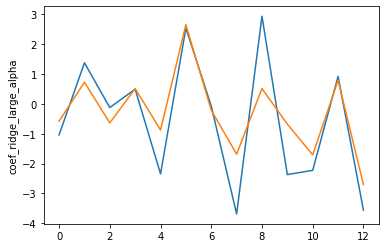

In [145]:
sns.lineplot(coeffs.index, "coef_linear_regressor", data = coeffs)
sns.lineplot(coeffs.index, "coef_ridge_large_alpha", data = coeffs)


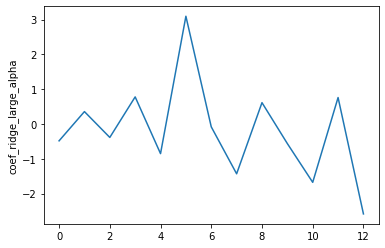

In [127]:
sns.lineplot(coeffs.index, "coef_ridge_large_alpha", data = coeffs, markers = True)

,features,coef_linear_regressor,coef_abs_linear_regressor,coef_ridge_small_alpha,coef_abs_ridge_small_alpha,coef_ridge_large_alpha,coef_abs_ridge_large_alpha
0,CRIM,-0.100473,0.100473,-0.100380,0.100380,-0.102537,0.102537
1,ZN,0.048546,0.048546,0.048573,0.048573,0.059268,0.059268
2,INDUS,0.075302,0.075302,0.074618,0.074618,0.004641,0.004641
3,CHAS,2.677793,2.677793,2.676268,2.676268,0.493972,0.493972
4,NOX,-16.554965,16.554965,-16.406109,16.406109,-0.176860,0.176860


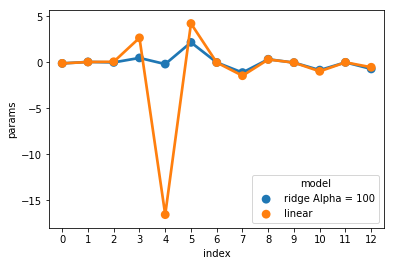

In [146]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': np.arange(1000)}
ridge = Ridge()

grid = GridSearchCV(ridge, param_grid=params, cv=10)
grid_fit = grid.fit(X_train, y_train)

/home/omar/Dev/Jedha/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [147]:
grid_fit.score(X_test, y_test)

0.7159737929532337

In [148]:
grid_fit.best_params_

{'alpha': 8}